#  Introduction

I decided for my coursework to develop a deep learning convolutional nueral network that would take an image of a persons face and try to detect where the face and the eyes are in the image, and then deternmine where the eyes are looking. I found a dataset called gazecapture that was compiled for this exact purpose with well over one million images to use to train, validate and test the AI. [https://gazecapture.csail.mit.edu/index.php] 

# Methods

The first thing i will need to do is create folders for the train, test and validation data as they are not already formatted yet so I divided up the 1473 different sets of images and created a folder for each set and created a text file with the path of each image to make it easier for the program to find later

In [28]:
import keras, os, shutil
from os.path import join
import numpy
import numpy as np
import glob
import json
import cv2
import string
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# where the dataset is held
dataset_dir = "C:/Users/User/Desktop/Eyetracking"
dirs = glob.glob(os.path.join(dataset_dir, "0*"))
train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")
test_dir = os.path.join(dataset_dir, "test")
j=1

for dir in dirs[:]:
    print("analyzing {}".format(dir))

    # opening json files within each set
    face_file = open(join(dataset_dir, dir, "appleFace.json"))
    left_file = open(join(dataset_dir, dir, "appleLeftEye.json"))
    right_file = open(join(dataset_dir, dir, "appleRightEye.json"))
    frames_file = open(join(dataset_dir, dir, "frames.json"))
    info_file = open(join(dataset_dir, dir, "info.json"))

    # read json content
    face_json = json.load(face_file)
    left_json = json.load(left_file)
    right_json = json.load(right_file)
    frames_json = json.load(frames_file)
    info_json = json.load(info_file)

    # divide in train, test and validation
    if j <= 750:
        os.mkdir(join(dataset_dir, "tr", os.path.basename(dir)))
        output = open(join(dataset_dir, "tr", os.path.basename(dir), "img.txt"), "w+")

    elif j > 750 and j <= 1000:
        os.mkdir(join(dataset_dir, "val", os.path.basename(dir)))
        output = open(join(dataset_dir, "val", os.path.basename(dir), "img.txt"), "w+")

    else:
        os.mkdir(join(dataset_dir, "te", os.path.basename(dir)))
        output = open(join(dataset_dir, "te", os.path.basename(dir), "img.txt"), "w+")

    # conducting a sanity check and removing any non valid images
    # and adding the path to a text file
    for i in range(0, int(info_json["TotalFrames"])):
        if left_json["IsValid"][i] and right_json["IsValid"][i] and face_json["IsValid"][i]:
            output.write(os.path.basename(dir) + "/" + frames_json[i])
            output.write("\n")
    print(output)
    print(j)
    j+=1
    # close the file
    output.close()

analyzing C:/Users/User/Desktop/Eyetracking\00002
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00002\\img.txt' mode='w+' encoding='cp1252'>
1
analyzing C:/Users/User/Desktop/Eyetracking\00003
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00003\\img.txt' mode='w+' encoding='cp1252'>
2
analyzing C:/Users/User/Desktop/Eyetracking\00005
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00005\\img.txt' mode='w+' encoding='cp1252'>
3
analyzing C:/Users/User/Desktop/Eyetracking\00006
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00006\\img.txt' mode='w+' encoding='cp1252'>
4
analyzing C:/Users/User/Desktop/Eyetracking\00010
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00010\\img.txt' mode='w+' encoding='cp1252'>
5
analyzing C:/Users/User/Desktop/Eyetracking\00024
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00024\\img.txt' mode='w+' encoding='cp1252'>
6
analyzing C:/Users/User/Desktop/Ey

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00173\\img.txt' mode='w+' encoding='cp1252'>
52
analyzing C:/Users/User/Desktop/Eyetracking\00178
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00178\\img.txt' mode='w+' encoding='cp1252'>
53
analyzing C:/Users/User/Desktop/Eyetracking\00179
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00179\\img.txt' mode='w+' encoding='cp1252'>
54
analyzing C:/Users/User/Desktop/Eyetracking\00190
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00190\\img.txt' mode='w+' encoding='cp1252'>
55
analyzing C:/Users/User/Desktop/Eyetracking\00191
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00191\\img.txt' mode='w+' encoding='cp1252'>
56
analyzing C:/Users/User/Desktop/Eyetracking\00192
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00192\\img.txt' mode='w+' encoding='cp1252'>
57
analyzing C:/Users/User/Desktop/Eyetracking\00194
<_io.TextIOWrapper name='C:/

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00288\\img.txt' mode='w+' encoding='cp1252'>
103
analyzing C:/Users/User/Desktop/Eyetracking\00289
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00289\\img.txt' mode='w+' encoding='cp1252'>
104
analyzing C:/Users/User/Desktop/Eyetracking\00295
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00295\\img.txt' mode='w+' encoding='cp1252'>
105
analyzing C:/Users/User/Desktop/Eyetracking\00296
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00296\\img.txt' mode='w+' encoding='cp1252'>
106
analyzing C:/Users/User/Desktop/Eyetracking\00299
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00299\\img.txt' mode='w+' encoding='cp1252'>
107
analyzing C:/Users/User/Desktop/Eyetracking\00300
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00300\\img.txt' mode='w+' encoding='cp1252'>
108
analyzing C:/Users/User/Desktop/Eyetracking\00303
<_io.TextIOWrapper nam

analyzing C:/Users/User/Desktop/Eyetracking\00481
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00481\\img.txt' mode='w+' encoding='cp1252'>
154
analyzing C:/Users/User/Desktop/Eyetracking\00487
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00487\\img.txt' mode='w+' encoding='cp1252'>
155
analyzing C:/Users/User/Desktop/Eyetracking\00488
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00488\\img.txt' mode='w+' encoding='cp1252'>
156
analyzing C:/Users/User/Desktop/Eyetracking\00491
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00491\\img.txt' mode='w+' encoding='cp1252'>
157
analyzing C:/Users/User/Desktop/Eyetracking\00492
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00492\\img.txt' mode='w+' encoding='cp1252'>
158
analyzing C:/Users/User/Desktop/Eyetracking\00493
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00493\\img.txt' mode='w+' encoding='cp1252'>
159
analyzing C:/Users/Use

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00574\\img.txt' mode='w+' encoding='cp1252'>
205
analyzing C:/Users/User/Desktop/Eyetracking\00575
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00575\\img.txt' mode='w+' encoding='cp1252'>
206
analyzing C:/Users/User/Desktop/Eyetracking\00578
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00578\\img.txt' mode='w+' encoding='cp1252'>
207
analyzing C:/Users/User/Desktop/Eyetracking\00580
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00580\\img.txt' mode='w+' encoding='cp1252'>
208
analyzing C:/Users/User/Desktop/Eyetracking\00581
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00581\\img.txt' mode='w+' encoding='cp1252'>
209
analyzing C:/Users/User/Desktop/Eyetracking\00584
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00584\\img.txt' mode='w+' encoding='cp1252'>
210
analyzing C:/Users/User/Desktop/Eyetracking\00585
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00668\\img.txt' mode='w+' encoding='cp1252'>
256
analyzing C:/Users/User/Desktop/Eyetracking\00669
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00669\\img.txt' mode='w+' encoding='cp1252'>
257
analyzing C:/Users/User/Desktop/Eyetracking\00670
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00670\\img.txt' mode='w+' encoding='cp1252'>
258
analyzing C:/Users/User/Desktop/Eyetracking\00672
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00672\\img.txt' mode='w+' encoding='cp1252'>
259
analyzing C:/Users/User/Desktop/Eyetracking\00675
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00675\\img.txt' mode='w+' encoding='cp1252'>
260
analyzing C:/Users/User/Desktop/Eyetracking\00676
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00676\\img.txt' mode='w+' encoding='cp1252'>
261
analyzing C:/Users/User/Desktop/Eyetracking\00677
<_io.TextIOWrapper nam

analyzing C:/Users/User/Desktop/Eyetracking\00750
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00750\\img.txt' mode='w+' encoding='cp1252'>
307
analyzing C:/Users/User/Desktop/Eyetracking\00752
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00752\\img.txt' mode='w+' encoding='cp1252'>
308
analyzing C:/Users/User/Desktop/Eyetracking\00753
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00753\\img.txt' mode='w+' encoding='cp1252'>
309
analyzing C:/Users/User/Desktop/Eyetracking\00755
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00755\\img.txt' mode='w+' encoding='cp1252'>
310
analyzing C:/Users/User/Desktop/Eyetracking\00756
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00756\\img.txt' mode='w+' encoding='cp1252'>
311
analyzing C:/Users/User/Desktop/Eyetracking\00757
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00757\\img.txt' mode='w+' encoding='cp1252'>
312
analyzing C:/Users/Use

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00850\\img.txt' mode='w+' encoding='cp1252'>
358
analyzing C:/Users/User/Desktop/Eyetracking\00851
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00851\\img.txt' mode='w+' encoding='cp1252'>
359
analyzing C:/Users/User/Desktop/Eyetracking\00852
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00852\\img.txt' mode='w+' encoding='cp1252'>
360
analyzing C:/Users/User/Desktop/Eyetracking\00853
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00853\\img.txt' mode='w+' encoding='cp1252'>
361
analyzing C:/Users/User/Desktop/Eyetracking\00855
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00855\\img.txt' mode='w+' encoding='cp1252'>
362
analyzing C:/Users/User/Desktop/Eyetracking\00859
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00859\\img.txt' mode='w+' encoding='cp1252'>
363
analyzing C:/Users/User/Desktop/Eyetracking\00861
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00944\\img.txt' mode='w+' encoding='cp1252'>
410
analyzing C:/Users/User/Desktop/Eyetracking\00945
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00945\\img.txt' mode='w+' encoding='cp1252'>
411
analyzing C:/Users/User/Desktop/Eyetracking\00947
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00947\\img.txt' mode='w+' encoding='cp1252'>
412
analyzing C:/Users/User/Desktop/Eyetracking\00948
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00948\\img.txt' mode='w+' encoding='cp1252'>
413
analyzing C:/Users/User/Desktop/Eyetracking\00949
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00949\\img.txt' mode='w+' encoding='cp1252'>
414
analyzing C:/Users/User/Desktop/Eyetracking\00953
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\00953\\img.txt' mode='w+' encoding='cp1252'>
415
analyzing C:/Users/User/Desktop/Eyetracking\00955
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01038\\img.txt' mode='w+' encoding='cp1252'>
461
analyzing C:/Users/User/Desktop/Eyetracking\01039
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01039\\img.txt' mode='w+' encoding='cp1252'>
462
analyzing C:/Users/User/Desktop/Eyetracking\01041
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01041\\img.txt' mode='w+' encoding='cp1252'>
463
analyzing C:/Users/User/Desktop/Eyetracking\01042
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01042\\img.txt' mode='w+' encoding='cp1252'>
464
analyzing C:/Users/User/Desktop/Eyetracking\01044
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01044\\img.txt' mode='w+' encoding='cp1252'>
465
analyzing C:/Users/User/Desktop/Eyetracking\01045
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01045\\img.txt' mode='w+' encoding='cp1252'>
466
analyzing C:/Users/User/Desktop/Eyetracking\01046
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01109\\img.txt' mode='w+' encoding='cp1252'>
512
analyzing C:/Users/User/Desktop/Eyetracking\01110
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01110\\img.txt' mode='w+' encoding='cp1252'>
513
analyzing C:/Users/User/Desktop/Eyetracking\01118
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01118\\img.txt' mode='w+' encoding='cp1252'>
514
analyzing C:/Users/User/Desktop/Eyetracking\01119
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01119\\img.txt' mode='w+' encoding='cp1252'>
515
analyzing C:/Users/User/Desktop/Eyetracking\01120
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01120\\img.txt' mode='w+' encoding='cp1252'>
516
analyzing C:/Users/User/Desktop/Eyetracking\01121
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01121\\img.txt' mode='w+' encoding='cp1252'>
517
analyzing C:/Users/User/Desktop/Eyetracking\01122
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01186\\img.txt' mode='w+' encoding='cp1252'>
563
analyzing C:/Users/User/Desktop/Eyetracking\01188
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01188\\img.txt' mode='w+' encoding='cp1252'>
564
analyzing C:/Users/User/Desktop/Eyetracking\01191
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01191\\img.txt' mode='w+' encoding='cp1252'>
565
analyzing C:/Users/User/Desktop/Eyetracking\01195
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01195\\img.txt' mode='w+' encoding='cp1252'>
566
analyzing C:/Users/User/Desktop/Eyetracking\01199
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01199\\img.txt' mode='w+' encoding='cp1252'>
567
analyzing C:/Users/User/Desktop/Eyetracking\01200
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01200\\img.txt' mode='w+' encoding='cp1252'>
568
analyzing C:/Users/User/Desktop/Eyetracking\01201
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01286\\img.txt' mode='w+' encoding='cp1252'>
614
analyzing C:/Users/User/Desktop/Eyetracking\01293
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01293\\img.txt' mode='w+' encoding='cp1252'>
615
analyzing C:/Users/User/Desktop/Eyetracking\01295
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01295\\img.txt' mode='w+' encoding='cp1252'>
616
analyzing C:/Users/User/Desktop/Eyetracking\01297
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01297\\img.txt' mode='w+' encoding='cp1252'>
617
analyzing C:/Users/User/Desktop/Eyetracking\01298
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01298\\img.txt' mode='w+' encoding='cp1252'>
618
analyzing C:/Users/User/Desktop/Eyetracking\01300
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01300\\img.txt' mode='w+' encoding='cp1252'>
619
analyzing C:/Users/User/Desktop/Eyetracking\01301
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01387\\img.txt' mode='w+' encoding='cp1252'>
665
analyzing C:/Users/User/Desktop/Eyetracking\01388
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01388\\img.txt' mode='w+' encoding='cp1252'>
666
analyzing C:/Users/User/Desktop/Eyetracking\01389
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01389\\img.txt' mode='w+' encoding='cp1252'>
667
analyzing C:/Users/User/Desktop/Eyetracking\01390
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01390\\img.txt' mode='w+' encoding='cp1252'>
668
analyzing C:/Users/User/Desktop/Eyetracking\01391
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01391\\img.txt' mode='w+' encoding='cp1252'>
669
analyzing C:/Users/User/Desktop/Eyetracking\01392
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01392\\img.txt' mode='w+' encoding='cp1252'>
670
analyzing C:/Users/User/Desktop/Eyetracking\01393
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01483\\img.txt' mode='w+' encoding='cp1252'>
716
analyzing C:/Users/User/Desktop/Eyetracking\01485
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01485\\img.txt' mode='w+' encoding='cp1252'>
717
analyzing C:/Users/User/Desktop/Eyetracking\01486
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01486\\img.txt' mode='w+' encoding='cp1252'>
718
analyzing C:/Users/User/Desktop/Eyetracking\01487
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01487\\img.txt' mode='w+' encoding='cp1252'>
719
analyzing C:/Users/User/Desktop/Eyetracking\01488
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01488\\img.txt' mode='w+' encoding='cp1252'>
720
analyzing C:/Users/User/Desktop/Eyetracking\01491
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\tr\\01491\\img.txt' mode='w+' encoding='cp1252'>
721
analyzing C:/Users/User/Desktop/Eyetracking\01492
<_io.TextIOWrapper nam

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01613\\img.txt' mode='w+' encoding='cp1252'>
767
analyzing C:/Users/User/Desktop/Eyetracking\01617
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01617\\img.txt' mode='w+' encoding='cp1252'>
768
analyzing C:/Users/User/Desktop/Eyetracking\01618
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01618\\img.txt' mode='w+' encoding='cp1252'>
769
analyzing C:/Users/User/Desktop/Eyetracking\01625
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01625\\img.txt' mode='w+' encoding='cp1252'>
770
analyzing C:/Users/User/Desktop/Eyetracking\01627
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01627\\img.txt' mode='w+' encoding='cp1252'>
771
analyzing C:/Users/User/Desktop/Eyetracking\01630
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01630\\img.txt' mode='w+' encoding='cp1252'>
772
analyzing C:/Users/User/Desktop/Eyetracking\01631
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01719\\img.txt' mode='w+' encoding='cp1252'>
817
analyzing C:/Users/User/Desktop/Eyetracking\01720
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01720\\img.txt' mode='w+' encoding='cp1252'>
818
analyzing C:/Users/User/Desktop/Eyetracking\01726
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01726\\img.txt' mode='w+' encoding='cp1252'>
819
analyzing C:/Users/User/Desktop/Eyetracking\01727
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01727\\img.txt' mode='w+' encoding='cp1252'>
820
analyzing C:/Users/User/Desktop/Eyetracking\01728
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01728\\img.txt' mode='w+' encoding='cp1252'>
821
analyzing C:/Users/User/Desktop/Eyetracking\01729
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01729\\img.txt' mode='w+' encoding='cp1252'>
822
analyzing C:/Users/User/Desktop/Eyetracking\01730
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01827\\img.txt' mode='w+' encoding='cp1252'>
867
analyzing C:/Users/User/Desktop/Eyetracking\01828
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01828\\img.txt' mode='w+' encoding='cp1252'>
868
analyzing C:/Users/User/Desktop/Eyetracking\01830
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01830\\img.txt' mode='w+' encoding='cp1252'>
869
analyzing C:/Users/User/Desktop/Eyetracking\01833
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01833\\img.txt' mode='w+' encoding='cp1252'>
870
analyzing C:/Users/User/Desktop/Eyetracking\01843
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01843\\img.txt' mode='w+' encoding='cp1252'>
871
analyzing C:/Users/User/Desktop/Eyetracking\01845
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01845\\img.txt' mode='w+' encoding='cp1252'>
872
analyzing C:/Users/User/Desktop/Eyetracking\01849
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01933\\img.txt' mode='w+' encoding='cp1252'>
917
analyzing C:/Users/User/Desktop/Eyetracking\01936
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01936\\img.txt' mode='w+' encoding='cp1252'>
918
analyzing C:/Users/User/Desktop/Eyetracking\01939
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01939\\img.txt' mode='w+' encoding='cp1252'>
919
analyzing C:/Users/User/Desktop/Eyetracking\01941
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01941\\img.txt' mode='w+' encoding='cp1252'>
920
analyzing C:/Users/User/Desktop/Eyetracking\01943
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01943\\img.txt' mode='w+' encoding='cp1252'>
921
analyzing C:/Users/User/Desktop/Eyetracking\01959
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\01959\\img.txt' mode='w+' encoding='cp1252'>
922
analyzing C:/Users/User/Desktop/Eyetracking\01960
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\02056\\img.txt' mode='w+' encoding='cp1252'>
967
analyzing C:/Users/User/Desktop/Eyetracking\02058
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\02058\\img.txt' mode='w+' encoding='cp1252'>
968
analyzing C:/Users/User/Desktop/Eyetracking\02059
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\02059\\img.txt' mode='w+' encoding='cp1252'>
969
analyzing C:/Users/User/Desktop/Eyetracking\02060
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\02060\\img.txt' mode='w+' encoding='cp1252'>
970
analyzing C:/Users/User/Desktop/Eyetracking\02061
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\02061\\img.txt' mode='w+' encoding='cp1252'>
971
analyzing C:/Users/User/Desktop/Eyetracking\02064
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\val\\02064\\img.txt' mode='w+' encoding='cp1252'>
972
analyzing C:/Users/User/Desktop/Eyetracking\02065
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02174\\img.txt' mode='w+' encoding='cp1252'>
1018
analyzing C:/Users/User/Desktop/Eyetracking\02186
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02186\\img.txt' mode='w+' encoding='cp1252'>
1019
analyzing C:/Users/User/Desktop/Eyetracking\02187
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02187\\img.txt' mode='w+' encoding='cp1252'>
1020
analyzing C:/Users/User/Desktop/Eyetracking\02190
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02190\\img.txt' mode='w+' encoding='cp1252'>
1021
analyzing C:/Users/User/Desktop/Eyetracking\02193
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02193\\img.txt' mode='w+' encoding='cp1252'>
1022
analyzing C:/Users/User/Desktop/Eyetracking\02194
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02194\\img.txt' mode='w+' encoding='cp1252'>
1023
analyzing C:/Users/User/Desktop/Eyetracking\02197
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02300\\img.txt' mode='w+' encoding='cp1252'>
1069
analyzing C:/Users/User/Desktop/Eyetracking\02301
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02301\\img.txt' mode='w+' encoding='cp1252'>
1070
analyzing C:/Users/User/Desktop/Eyetracking\02311
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02311\\img.txt' mode='w+' encoding='cp1252'>
1071
analyzing C:/Users/User/Desktop/Eyetracking\02314
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02314\\img.txt' mode='w+' encoding='cp1252'>
1072
analyzing C:/Users/User/Desktop/Eyetracking\02319
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02319\\img.txt' mode='w+' encoding='cp1252'>
1073
analyzing C:/Users/User/Desktop/Eyetracking\02321
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02321\\img.txt' mode='w+' encoding='cp1252'>
1074
analyzing C:/Users/User/Desktop/Eyetracking\02322
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02426\\img.txt' mode='w+' encoding='cp1252'>
1119
analyzing C:/Users/User/Desktop/Eyetracking\02430
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02430\\img.txt' mode='w+' encoding='cp1252'>
1120
analyzing C:/Users/User/Desktop/Eyetracking\02431
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02431\\img.txt' mode='w+' encoding='cp1252'>
1121
analyzing C:/Users/User/Desktop/Eyetracking\02432
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02432\\img.txt' mode='w+' encoding='cp1252'>
1122
analyzing C:/Users/User/Desktop/Eyetracking\02434
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02434\\img.txt' mode='w+' encoding='cp1252'>
1123
analyzing C:/Users/User/Desktop/Eyetracking\02435
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02435\\img.txt' mode='w+' encoding='cp1252'>
1124
analyzing C:/Users/User/Desktop/Eyetracking\02436
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02553\\img.txt' mode='w+' encoding='cp1252'>
1170
analyzing C:/Users/User/Desktop/Eyetracking\02554
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02554\\img.txt' mode='w+' encoding='cp1252'>
1171
analyzing C:/Users/User/Desktop/Eyetracking\02557
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02557\\img.txt' mode='w+' encoding='cp1252'>
1172
analyzing C:/Users/User/Desktop/Eyetracking\02559
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02559\\img.txt' mode='w+' encoding='cp1252'>
1173
analyzing C:/Users/User/Desktop/Eyetracking\02566
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02566\\img.txt' mode='w+' encoding='cp1252'>
1174
analyzing C:/Users/User/Desktop/Eyetracking\02567
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02567\\img.txt' mode='w+' encoding='cp1252'>
1175
analyzing C:/Users/User/Desktop/Eyetracking\02571
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02732\\img.txt' mode='w+' encoding='cp1252'>
1220
analyzing C:/Users/User/Desktop/Eyetracking\02734
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02734\\img.txt' mode='w+' encoding='cp1252'>
1221
analyzing C:/Users/User/Desktop/Eyetracking\02736
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02736\\img.txt' mode='w+' encoding='cp1252'>
1222
analyzing C:/Users/User/Desktop/Eyetracking\02737
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02737\\img.txt' mode='w+' encoding='cp1252'>
1223
analyzing C:/Users/User/Desktop/Eyetracking\02739
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02739\\img.txt' mode='w+' encoding='cp1252'>
1224
analyzing C:/Users/User/Desktop/Eyetracking\02740
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02740\\img.txt' mode='w+' encoding='cp1252'>
1225
analyzing C:/Users/User/Desktop/Eyetracking\02741
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02879\\img.txt' mode='w+' encoding='cp1252'>
1270
analyzing C:/Users/User/Desktop/Eyetracking\02880
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02880\\img.txt' mode='w+' encoding='cp1252'>
1271
analyzing C:/Users/User/Desktop/Eyetracking\02882
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02882\\img.txt' mode='w+' encoding='cp1252'>
1272
analyzing C:/Users/User/Desktop/Eyetracking\02883
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02883\\img.txt' mode='w+' encoding='cp1252'>
1273
analyzing C:/Users/User/Desktop/Eyetracking\02885
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02885\\img.txt' mode='w+' encoding='cp1252'>
1274
analyzing C:/Users/User/Desktop/Eyetracking\02888
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\02888\\img.txt' mode='w+' encoding='cp1252'>
1275
analyzing C:/Users/User/Desktop/Eyetracking\02898
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03012\\img.txt' mode='w+' encoding='cp1252'>
1321
analyzing C:/Users/User/Desktop/Eyetracking\03013
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03013\\img.txt' mode='w+' encoding='cp1252'>
1322
analyzing C:/Users/User/Desktop/Eyetracking\03014
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03014\\img.txt' mode='w+' encoding='cp1252'>
1323
analyzing C:/Users/User/Desktop/Eyetracking\03023
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03023\\img.txt' mode='w+' encoding='cp1252'>
1324
analyzing C:/Users/User/Desktop/Eyetracking\03024
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03024\\img.txt' mode='w+' encoding='cp1252'>
1325
analyzing C:/Users/User/Desktop/Eyetracking\03026
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03026\\img.txt' mode='w+' encoding='cp1252'>
1326
analyzing C:/Users/User/Desktop/Eyetracking\03027
<_io.TextIOWrapp

analyzing C:/Users/User/Desktop/Eyetracking\03202
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03202\\img.txt' mode='w+' encoding='cp1252'>
1372
analyzing C:/Users/User/Desktop/Eyetracking\03205
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03205\\img.txt' mode='w+' encoding='cp1252'>
1373
analyzing C:/Users/User/Desktop/Eyetracking\03206
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03206\\img.txt' mode='w+' encoding='cp1252'>
1374
analyzing C:/Users/User/Desktop/Eyetracking\03211
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03211\\img.txt' mode='w+' encoding='cp1252'>
1375
analyzing C:/Users/User/Desktop/Eyetracking\03212
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03212\\img.txt' mode='w+' encoding='cp1252'>
1376
analyzing C:/Users/User/Desktop/Eyetracking\03214
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03214\\img.txt' mode='w+' encoding='cp1252'>
1377
analyzing C:/Use

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03344\\img.txt' mode='w+' encoding='cp1252'>
1422
analyzing C:/Users/User/Desktop/Eyetracking\03348
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03348\\img.txt' mode='w+' encoding='cp1252'>
1423
analyzing C:/Users/User/Desktop/Eyetracking\03349
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03349\\img.txt' mode='w+' encoding='cp1252'>
1424
analyzing C:/Users/User/Desktop/Eyetracking\03351
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03351\\img.txt' mode='w+' encoding='cp1252'>
1425
analyzing C:/Users/User/Desktop/Eyetracking\03352
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03352\\img.txt' mode='w+' encoding='cp1252'>
1426
analyzing C:/Users/User/Desktop/Eyetracking\03354
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03354\\img.txt' mode='w+' encoding='cp1252'>
1427
analyzing C:/Users/User/Desktop/Eyetracking\03358
<_io.TextIOWrapp

<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03501\\img.txt' mode='w+' encoding='cp1252'>
1472
analyzing C:/Users/User/Desktop/Eyetracking\03502
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03502\\img.txt' mode='w+' encoding='cp1252'>
1473
analyzing C:/Users/User/Desktop/Eyetracking\03523
<_io.TextIOWrapper name='C:/Users/User/Desktop/Eyetracking\\te\\03523\\img.txt' mode='w+' encoding='cp1252'>
1474


How I decided to parse the image information is by first determining where the face, eyes and the surrounding grid after this is done I resize the image so it is able to fit into the array shape as well as normalizing each. Then the correspoding coordinate information is stored into seperate batch arrays with the first segment of the return representing the input data and the y_batch being the coordinates of where the user is looking and the output data

Due to the fact I have already formatted my data into train, testing and validtion segments and tunning the code above will cause an error as trying to make a directory that already exists will cause an error. I also had to import the libraries and initialize certain variables again.

In [1]:
import keras, os, shutil
import tensorflow as tf
from os.path import join
import numpy
import numpy as np
import glob
import json
import cv2
import string
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import random


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

dataset_dir = "C:/Users/User/Desktop/Eyetracking"
dirs = glob.glob(os.path.join(dataset_dir, "0*"))
train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")
test_dir = os.path.join(dataset_dir, "test")

# this function returtns a list of the paths for each the train and validtion
# sets, the amount is limited as we cannot have a too large of a shape
def load_data_names(path, n):
    seqs = sorted(glob.glob(join(path, "0*")))
    seq_list = []

    for seq in seqs:     
        file = open(join(seq,"img.txt"), "r")
        content = file.read().splitlines()
        for line in content:
            seq_list.append(line)
    print(len(seq_list))
    return seq_list[:n]

# load data is used to find convert the images into a uniformed numpy array
# for each input needed
def load_data(names, path, batch_size):
    
    left_eye_batch = np.zeros(shape=(batch_size, 64, 64, 3), dtype=np.float32)
    right_eye_batch = np.zeros(shape=(batch_size, 64, 64, 3), dtype=np.float32)
    face_batch = np.zeros(shape=(batch_size, 64, 64, 3), dtype=np.float32)
    face_grid_batch = np.zeros(shape=(batch_size, 1, 25, 25), dtype=np.float32)
    y_batch = np.zeros((batch_size, 2), dtype=np.float32)
    
    b = 0

    while b < batch_size:
        
        # lottery
        i = random.randint(0, len(names)-1)

        img = names[i]
        # directory path
        dir = img[:5]

        # frame name
        frame = img[6:]

        # index of the frame inside the sequence
        idx = int(frame[:-4])

        
        face_file = open(join(path, dir, "appleFace.json"))
        left_file = open(join(path, dir, "appleLeftEye.json"))
        right_file = open(join(path, dir, "appleRightEye.json"))
        frames_file = open(join(path, dir, "frames.json"))
        info_file = open(join(path, dir, "info.json"))
        grid_file = open(join(path, dir, "faceGrid.json"))
        dot_file = open(join(path, dir, "dotInfo.json"))
        
        face_json = json.load(face_file)
        left_json = json.load(left_file)
        right_json = json.load(right_file)
        frames_json = json.load(frames_file)
        info_json = json.load(info_file)
        grid_json = json.load(grid_file)
        dot_json = json.load(dot_file)

        if face_json["IsValid"][idx] == 0 or left_json["IsValid"][idx] == 0 or right_json["IsValid"][idx] == 0 or int(face_json["X"][idx]) <= 0 or int(face_json["Y"][idx]) <= 0 or int(left_json["X"][idx]) <= 0 or int(left_json["Y"][idx]) <= 0 or int(right_json["X"][idx]) <= 0 or int(right_json["Y"][idx]) <= 0 or int(face_json["W"][idx]) <= 0 or int(face_json["H"][idx]) <= 0 or int(left_json["W"][idx]) <= 0 or int(left_json["H"][idx]) <= 0 or int(right_json["W"][idx]) <= 0 or int(right_json["H"][idx]) <= 0:
            continue
        frames = cv2.imread(os.path.join(path, dir, "frames", frame))
#get face coordinates
        temp_x_face = int(face_json["X"][idx])
        temp_y_face = int(face_json["X"][idx])
        w = int(face_json["W"][idx])
        h = int(face_json["H"][idx])
        box_x_face = temp_x_face + w
        box_y_face = temp_y_face + h
        face = frames[temp_y_face:box_y_face,temp_x_face:box_y_face]

#get left eye coordinates
        temp_x = temp_x_face + int(left_json["X"][idx])
        temp_y = temp_y_face + int(left_json["Y"][idx])
        w = int(left_json["W"][idx])
        h = int(left_json["H"][idx])
        box_x = temp_x + w
        box_y = temp_y + h
        left_eye = frames[temp_y:box_y, temp_x:box_x]

#get right eye coordinates
        temp_x = temp_x_face + int(right_json["X"][idx])
        temp_y = temp_y_face + int(right_json["Y"][idx])
        w = int(right_json["W"][idx])
        h = int(right_json["H"][idx])
        box_x = temp_x + w
        box_y = temp_y + h
        right_eye = frames[temp_y:box_y, temp_x:box_y]

#get face grid coordinates
        face_grid = np.zeros(shape=(1, 25, 25), dtype=np.float32)
        temp_x = int(grid_json["X"][idx])
        temp_y = int(grid_json["Y"][idx])
        w = int(grid_json["W"][idx])
        h = int(grid_json["H"][idx])
        box_x = temp_x + w
        box_y = temp_y + h
        face_grid[0, temp_y:box_y, temp_x:box_x] = 1
        
        
        y_x = dot_json["XCam"][idx]
        y_y = dot_json["YCam"][idx]
        
        try:
            # resize each image and if it can't due to a shape issue skip this frame
            face = cv2.resize(face, (64, 64))
            left_eye = cv2.resize(left_eye,(64, 64))
            right_eye = cv2.resize(right_eye, (64, 64))
        except Exception as e:
            continue

        # normalise each peice of data
        face = face.astype('float32') / 255.
        face = face - np.mean(face)

        left_eye = left_eye.astype('float32') / 255.
        left_eye = left_eye - np.mean(left_eye)

        right_eye = right_eye.astype('float32') / 255.
        right_eye = right_eye - np.mean(right_eye)

        # add to the batch list
        right_eye_batch[b] = right_eye
        left_eye_batch[b]=left_eye
        face_batch[b] = face
        face_grid_batch[b] = face_grid
        y_batch[b][0] = y_x
        y_batch[b][1] = y_y
        b+=1
    return [right_eye_batch, left_eye_batch, face_batch, face_grid_batch], y_batch

test = load_data_names(os.path.join(dataset_dir, "tr"), 1)
x = load_data(test, dataset_dir, 1)
print("batch example:")
print(x[0], x[1])

Using TensorFlow backend.


645876
batch example:
[array([[[[ 0.16627508,  0.23294175,  0.276079  ],
         [ 0.16627508,  0.23294175,  0.26823586],
         [ 0.16235352,  0.23294175,  0.26039273],
         ...,
         [ 0.15451038,  0.22117704,  0.2643143 ],
         [ 0.14666724,  0.22117704,  0.2525496 ],
         [ 0.14274567,  0.21725547,  0.2525496 ]],

        [[ 0.17019665,  0.23294175,  0.27215743],
         [ 0.15843195,  0.22509861,  0.26039273],
         [ 0.16235352,  0.22902018,  0.2643143 ],
         ...,
         [ 0.1388241 ,  0.20549077,  0.24862802],
         [ 0.1388241 ,  0.2133339 ,  0.24470645],
         [ 0.13098097,  0.20549077,  0.23686332]],

        [[ 0.15843195,  0.22509861,  0.26039273],
         [ 0.16235352,  0.22902018,  0.2643143 ],
         [ 0.15843195,  0.22509861,  0.26039273],
         ...,
         [ 0.11921626,  0.18588293,  0.22902018],
         [ 0.12313783,  0.19764763,  0.22902018],
         [ 0.11137313,  0.18588293,  0.21725547]],

        ...,

        [[ 0.11

# Model

Since I have two seperate determinants which are the the eyes and the face I needed to first build their models and then make a final model that used two eye models a face model and one smaller model for the grid and then concatenate each model. The eye and face model are both conv2D using maxPooling2D using a relu activation, as well as the an output in a certain way as the model uses both, as the actual output is a linear activation as the coordinates of where the eyes are looking is a two dimensional array.

In [2]:
from keras import layers
from keras import models
from keras.layers import Layer
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D, concatenate
from keras.models import Model

def eye_model(img_cols, img_rows, img_ch):
    eye_img_input = Input(shape=(img_cols, img_rows, img_ch))

    h = Conv2D(96, (11, 11), activation='relu')(eye_img_input)
    h = MaxPool2D(pool_size=(2, 2))(h)
    h = Conv2D(256, (5, 5), activation='relu')(h)
    h = MaxPool2D(pool_size=(2, 2))(h)
    h = Conv2D(384, (3, 3), activation='relu')(h)
    h = MaxPool2D(pool_size=(2, 2))(h)
    out = Conv2D(64, (1, 1), activation='relu')(h)

    model = Model(inputs=eye_img_input, outputs=out)

    return model

    
def face_model(img_cols, img_rows, img_ch):
    face_img_input = Input(shape=(img_cols, img_rows, img_ch))

    h = Conv2D(96, (11, 11), activation='relu')(face_img_input)
    h = MaxPool2D(pool_size=(2, 2))(h)
    h = Conv2D(256, (5, 5), activation='relu')(h)
    h = MaxPool2D(pool_size=(2, 2))(h)
    h = Conv2D(384, (3, 3), activation='relu')(h)
    h = MaxPool2D(pool_size=(2, 2))(h)
    out = Conv2D(64, (1, 1), activation='relu')(h)

    model = Model(inputs=face_img_input, outputs=out)

    return model

def face_grid_model(img_ch, img_cols, img_rows):
    eye_net = eye_model(img_cols, img_rows, img_ch)
    face_net = face_model(img_cols, img_rows, img_ch)
    
    left_model_input = Input(shape=(img_cols, img_rows, img_ch))
    left_eye_model = eye_net(left_model_input)
    
    right_model_input = Input(shape=(img_cols, img_rows, img_ch))
    right_eye_model = eye_net(right_model_input)
    
    face_model_input = Input(shape=(img_cols, img_rows, img_ch))
    faceModel = face_net(face_model_input)
    
    face_grid = Input(shape=(1,25,25))

    #dense layers for eyes
    e = concatenate([left_eye_model, right_eye_model])
    e = Flatten()(e)
    fc_e1 = Dense(128, activation='relu')(e)
    
    # dense layers for face
    f = Flatten()(faceModel)
    fc_f1 = Dense(128, activation='relu')(f)
    fc_f2 = Dense(64, activation='relu')(fc_f1)

    # dense layers for face grid
    fg = Flatten()(face_grid)
    fc_fg1 = Dense(256, activation='relu')(fg)
    fc_fg2 = Dense(128, activation='relu')(fc_fg1)

    # final dense layers
    h = concatenate([fc_e1, fc_f2, fc_fg2])
    fc1 = Dense(128, activation='relu')(h)
    fc2 = Dense(2, activation = 'linear')(fc1)


    final_model = Model(inputs=[right_model_input, left_model_input, face_model_input, face_grid],outputs=[fc2])

    return final_model


model = face_grid_model(3, 64, 64)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 4, 4, 64)     1559360     input_3[0][0]                    
                                                                 input_4[0][0]              

I decided to use a the mean squared error loss function because if this model is to be used pratically accuarcy is less important than the loss so the mse function is used as it punishes large errors heavily, meaning the model will try to zero in on trying to have more small errors if it is to have any. I went with adam as the optimizer as it is mainly used for when there is a large amount of data.

In [3]:
from keras import optimizers

model.compile(loss='mse',
              optimizer='adam',
              metrics=['acc'])


# Training

I first had to implement the generator for the train and validation data these functions call load data and return the four different numpy arrays. As well as a batch size to parse to the load_data function at first I am going to start with only 2000 training images and 1000 validation images to train the model.

In [4]:
train = load_data_names(join(dataset_dir, "tr"), 2000)
val = load_data_names(join(dataset_dir, "val"), 1000)

def train_data_generator(names, path):
    while True:
        x,y = load_data(names, path, 10)
        yield x,y

def val_data_generator(names, path):
    while True:
        x,y = load_data(names, path, 10)
        yield x,y
        
print("amount of images for training:")
print(len(train))
print("amount of images for validation:")
print(len(val))

645876
300367
amount of images for training:
2000
amount of images for validation:
1000


To train my model I will use 10 epochs and 200 steps per epoch to ensure each piece of data is used.

In [5]:
history = model.fit(train_data_generator(train, dataset_dir), 
                    steps_per_epoch=len(train)/10,
                    epochs=10,
                    validation_data=val_data_generator(val, dataset_dir),
                    validation_steps=len(val)/10)


Epoch 1/10
200/200 [==============================] - 297s 1s/step - loss: 30.5073 - acc: 0.9420 - val_loss: 18.2072 - val_acc: 0.9490
Epoch 2/10
200/200 [==============================] - 316s 2s/step - loss: 27.5121 - acc: 0.9390 - val_loss: 49.7093 - val_acc: 0.8790
Epoch 3/10
200/200 [==============================] - 295s 1s/step - loss: 27.3346 - acc: 0.9505 - val_loss: 39.3667 - val_acc: 0.8950
Epoch 4/10
200/200 [==============================] - 287s 1s/step - loss: 26.5457 - acc: 0.9545 - val_loss: 79.6297 - val_acc: 0.8820
Epoch 5/10
200/200 [==============================] - 286s 1s/step - loss: 25.6998 - acc: 0.9515 - val_loss: 92.9970 - val_acc: 0.9340
Epoch 6/10
200/200 [==============================] - 291s 1s/step - loss: 25.4046 - acc: 0.9525 - val_loss: 42.9211 - val_acc: 0.8920
Epoch 7/10
200/200 [==============================] - 286s 1s/step - loss: 24.3922 - acc: 0.9530 - val_loss: 41.4078 - val_acc: 0.9040
Epoch 8/10
200/200 [==============================] - 2

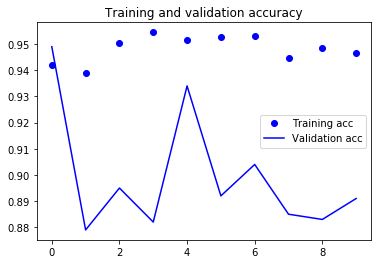

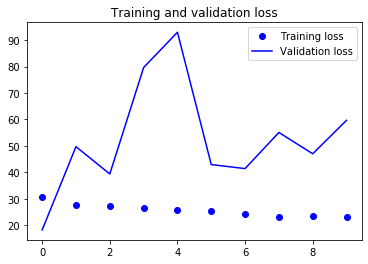

In [6]:
import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Although there appears to be some overfitting in the validation towards the last couple of epochs, but it seems to regreess fine for the training accuracy or loss, as well as how much the loss has decreased overall. With a training accuracy of around 95% and losses around 21. With the validation mediating around the 89% accuracy mark and a loss of around 39. I think it we should test this model on unseen data.

In [7]:
test = load_data_names(join(dataset_dir, "te"))
model = face_grid_model(3, 64, 64)
model.compile(loss='mse',
              optimizer='adam',
              metrics=['acc'])
def train_data_generator(names, path):
    while True:
        x,y = load_data(names, path, 400)
        yield x,y
        
x, y = load_data(test,  dataset_dir)

# x, y = load_batch_from_names(test_names[it:it + chunk_size], dataset_path, img_ch, img_cols, img_rows)
predictions = model.predict(x=x, batch_size=25, verbose=1)
for i, prediction in enumerate(predictions):
    print("PR: {} {}".format(prediction[0], prediction[1]))
    print("GT: {} {} \n".format(y[i][0], y[i][1]))

TypeError: load_data_names() missing 1 required positional argument: 'n'

The testing data I was expecting to see a loss of around 20 so it has done quite well compared to my expectations.

# evaluation

I have found while working on this project is that planning the model and its generators ahead of time is very important as much of my time was allocated to being able to fetch batch sized amount of data for the model. I also found that creating multiple models and concatenating them together was very good practice for such a neural network to function easily has if I did this sequentially I would have far to many trainable parameters and it would take hours per epoch to train. Finally I saw the usefulness and effectiveness of the mse loss function as I needed my model to have as small an error as possible, instead of a small amount of errors, this made my model far more effective in my opinion.